# Cargar Dataset

## 1.Inicializando Librerías

Para realizar nuestro trabajo utilizaremos las siguientes librerías:
Usaremos Numpy para poder utilizar su estructura de arreglos; con Matplotlib graficaremos la información de forma más sencilla. Por último, utilizaremos pandas para poder leer el dataset propuesto por el trabajo y para almacenarlo en su estructura de dataframes.

In [132]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

## 2.Lectura del Dataset

El trabajo propuesto por el curso de machine learning nos plantea entrenar un modelo con data histórica de desembolsos de préstamos de un banco  para así poder apoyar al banco en la predicción de los desembolsos. Para ello se nos entregó un dataset con las siguientes variables:

    idPrestamo: Identificador de Préstamo
    Target: indica si la persona cayó en mora (1) o cumplió con los pagos (0)
    monthly_debt_capacity: capacidad de endeudamiento mensual
    var_employment_time_in_months: cuantos meses seguidos lleva trabajando en su trabajo actual
    approved_amount: monto solicitado
    approved_term: cuotas solicitada
    sapproved_interest_amount: interés total a pagar
    var_net_income: salario
    person_gender: género
    credit_history_marital_status: estado civil
    var_max_sbs_qual_12m: si ha estado categorizado en la SBS en los últimos 12 meses
    person_degree_type_desc: nivel de educación
    default_request_term: si escogió el número de cuotas ofrecida (1)
    default_request_amount: si escogió el monto de dinero ofrecido (1)


In [133]:
df = pd.read_csv('datos_banco.csv', encoding = "ISO-8859-1")

Una vez hayamos cargado el dataset, procedemos a visualizar los datos.

# 1. Análisis Exploratorio y Tratamiento de Datos

## 1.1 - Visualizacion Corta del Dataframe
Lo primero que se decidió hacer fue ver el estado del dataframe, por lo que usamos la función head() de pandas. Se puede visualizar todas las columnas, y las primeras 5 filas.

In [134]:
df.head(5)

,idPrestamo,target,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,person_gender,credit_history_marital_status,var_max_sbs_qual_12m,person_degree_type_desc,default_request_term,default_request_amount
0,LIBDISP9832897855,1,252.39,9.0,"1,200",6,289.11,1140.125000,MALE,C,NORMAL,Secundaria,1,0
1,LIBDISP9021501745,1,244.57,50.0,"2,200",12,696.15,1061.375000,FEMALE,S,NORMAL,Secundaria,0,0
2,LIBDISP4057314971,0,491.5,64.0,"1,000",3,84.99,2082.196667,FEMALE,S,NORMAL,Secundaria,0,0
3,LIBDISP8375185888,0,848.65,77.0,"1,500",6,221.53,3422.423333,MALE,S,NORMAL,Universitaria,0,0
4,LIBDISP9694463037,0,470.52,82.0,"1,000",3,91.34,1882.090000,FEMALE,S,NORMAL,Universitaria,1,0


## 1.2 - Magnitud de Dataset
Luego, para tener una idea de la magnitud del dataset con el que se está trabajando, usamos la función shape() de Pandas para que nos retorne el número de filas y columnas de dicho dataset. El primer axis son las filas y la segunda las columnas.

In [135]:
df.shape

(1719, 14)

## 1.3 - Valores Nulos
Queríamos ver si existían valores nulos en el dataset que se va a usar, entonces usando la función isna(), mas sumando todo con sum(), podemos sumar la cantidad de valores nulos por cada columnas de DF. En este caso, podemos ver que la columna *var_employment_time_in_months* contiene 200 valores nulos.

In [136]:
df.isna().sum()

idPrestamo                         0
target                             0
monthly_debt_capacity              0
var_employment_time_in_months    200
approved_amount                    0
approved_term                      0
approved_interest_amount           0
var_net_income                     0
person_gender                      0
credit_history_marital_status      0
var_max_sbs_qual_12m               0
person_degree_type_desc            0
default_request_term               0
default_request_amount             0
dtype: int64

## 1.4 - Tipos de Atributos 
Es muy importante, antes de empezar a trabajar con la data de un dataset, saber qué tipos de atributos contiene. Para esto, se hizo uso de la función dtypes() de pandas, que , por cada columna, me retorna su tipo de dato.

In [137]:
df.dtypes

idPrestamo                        object
target                             int64
monthly_debt_capacity             object
var_employment_time_in_months    float64
approved_amount                   object
approved_term                      int64
approved_interest_amount          object
var_net_income                   float64
person_gender                     object
credit_history_marital_status     object
var_max_sbs_qual_12m              object
person_degree_type_desc           object
default_request_term               int64
default_request_amount             int64
dtype: object

Podemos ver que varias columnas están en tipo Object, lo que nos dice que el dataset no está listo para poder entrenarlo. Esto se arreglara posteriormente.

Para poder ver las estadísticas de las columnas numéricas, se hizo uso de la función describe() de pandas una vez más. Como podemos ver, solo toma en cuenta las columnas que están en tipos numéricos, es decir int o float. También podemos ver que los rangos de estas variables no coinciden, lo que se tendrá que arreglar posteriormente.

In [138]:
df.describe()

,target,var_employment_time_in_months,approved_term,var_net_income,default_request_term,default_request_amount
count,1719.000000,1519.000000,1719.000000,1719.000000,1719.000000,1719.0
mean,0.295521,33.979592,6.464805,2693.545884,0.507853,0.0
std,0.456409,26.889423,3.009842,1825.694773,0.500084,0.0
min,0.000000,-1.000000,1.000000,0.000000,0.000000,0.0
25%,0.000000,11.000000,6.000000,1750.000000,0.000000,0.0
50%,0.000000,26.000000,6.000000,2373.758333,1.000000,0.0
75%,1.000000,61.000000,6.000000,3075.133333,1.000000,0.0
max,1.000000,87.000000,12.000000,28587.000000,1.000000,0.0


Una vez más, sabiendo que solo toma en cuenta las columnas que están en tipos numéricos, es decir int o float, decidimos ver los histogramas de las columnas con la función hist() de pandas para ver cómo se están distribuyendo.

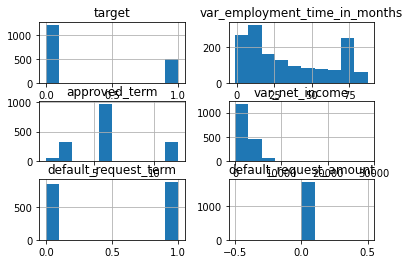

In [139]:
df.hist();

# 2.  Tratamiento de Datos

## 2.1.Descartamos variables / Feature Selection
En esta parte, posterior a la visualización de la data, procedemos a descartar variables del dataframe que no nos serán relevantes a la hora de entrenar el modelo. Estas variables son las siguientes: 

    person_gender: El género no influye en la decisión de otorgar un préstamo.
    person_degree_type_desc: El grado de estudios del cliente no es relevante.
    default_request_term: Contiene...
    default_request_amount: Flag que indica si el cliente acepto el monto propuesto por el banco.

A su vez decidimos mantener las siguientes variables:

    idPrestamo: Id del Préstamo    
    monthly_debt_capacity: Indica la capacidad de endeudamiento del cliente.
    var_employment_time_in_months: Indica el tiempo que el cliente ha permanecido en un trabajo estable.
    approved_amount: Monto solicitado para el préstamo.
    approved_term: Numero de cuotas en las que se dividió el préstamo.
    sapproved_interest_amount: Interés que tendrá que asumir el cliente por el préstamo.
    var_net_income: Salario actual del cliente, dinero con el que se pagara la deuda.
    credit_history_marital_status: Estado civil del cliente, podría ser relevante para asumir préstamos conjuntos dentro de un núcleo familiar.
    var_max_sbs_qual_12m: Categoría que posee en la base de Riesgos de la SBS.

Finalmente, retiramos la columna *Target* del dataframe original, ya que esta columna será nuestro representa el dominio de cada préstamo. Es decir, si finalmente el cliente pudo cancelar el préstamo sin caer en moras.

In [140]:
x_df = df.drop(["target","person_gender","default_request_term","default_request_amount","person_degree_type_desc"], axis = 1)

y_df = df["target"]

print("shape of x_df = ", x_df.shape)
print("shape of y_df = ", y_df.shape)

shape of x_df =  (1719, 9)
shape of y_df =  (1719,)


Después de haber retirado las columnas que consideramos irrelevante, usamos la función head() para poder visualizar como quedo el dataframe.

In [141]:
x_df.head(5)

,idPrestamo,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,credit_history_marital_status,var_max_sbs_qual_12m
0,LIBDISP9832897855,252.39,9.0,"1,200",6,289.11,1140.125000,C,NORMAL
1,LIBDISP9021501745,244.57,50.0,"2,200",12,696.15,1061.375000,S,NORMAL
2,LIBDISP4057314971,491.5,64.0,"1,000",3,84.99,2082.196667,S,NORMAL
3,LIBDISP8375185888,848.65,77.0,"1,500",6,221.53,3422.423333,S,NORMAL
4,LIBDISP9694463037,470.52,82.0,"1,000",3,91.34,1882.090000,S,NORMAL


## 2.2 Corrección de valores 
Dentro de la exploración pudimos identificar que todas las variables numéricas eran percibidas como texto debido a que el separador de enteros y decimales era ',’. Por ello, en el siguiente código retiramos tal carácter para que nuestras variables sean efectivamente numéricas. Esto se hizo gracias a la función replace() y to_numeric() de pandas, convirtiendo cada columna a dato *FLOAT*.

In [142]:
x_df["monthly_debt_capacity"] = x_df["monthly_debt_capacity"].replace(',','', regex=True)
x_df["monthly_debt_capacity"] = pd.to_numeric(x_df["monthly_debt_capacity"], downcast="float")

x_df["approved_amount"] = x_df["approved_amount"].replace(',','', regex=True)
x_df["approved_amount"] = pd.to_numeric(x_df["approved_amount"], downcast="float")

x_df["approved_term"] = x_df["approved_term"].replace(',','', regex=True)
x_df["approved_term"] = pd.to_numeric(x_df["approved_term"], downcast="float")

x_df["approved_interest_amount"] = x_df["approved_interest_amount"].replace(',','', regex=True)
x_df["approved_interest_amount"] = pd.to_numeric(x_df["approved_interest_amount"], downcast="float")

x_df["var_employment_time_in_months"] = x_df["var_employment_time_in_months"].replace(',','', regex=True)
x_df["var_employment_time_in_months"] = pd.to_numeric(x_df["var_employment_time_in_months"], downcast="float")

x_df["var_net_income"] = x_df["var_net_income"].replace(',','', regex=True)
x_df["var_net_income"] = pd.to_numeric(x_df["var_net_income"], downcast="float")

x_df.head()

,idPrestamo,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,credit_history_marital_status,var_max_sbs_qual_12m
0,LIBDISP9832897855,252.389999,9.0,1200.0,6.0,289.109985,1140.125000,C,NORMAL
1,LIBDISP9021501745,244.570007,50.0,2200.0,12.0,696.150024,1061.375000,S,NORMAL
2,LIBDISP4057314971,491.500000,64.0,1000.0,3.0,84.989998,2082.196777,S,NORMAL
3,LIBDISP8375185888,848.650024,77.0,1500.0,6.0,221.529999,3422.423340,S,NORMAL
4,LIBDISP9694463037,470.519989,82.0,1000.0,3.0,91.339996,1882.089966,S,NORMAL


Ahora, si describimos nuestras variables podemos validar que estos sean numéricos.

In [143]:
x_df.describe()

,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income
count,1719.000000,1519.000000,1719.000000,1719.000000,1719.000000,1719.000000
mean,584.639465,33.979591,2136.998291,6.464805,407.185822,2693.545898
std,459.958893,26.889423,1504.944702,3.009842,407.703064,1825.694702
min,-158.750000,-1.000000,500.000000,1.000000,22.820000,0.000000
25%,350.760010,11.000000,1000.000000,6.000000,152.320007,1750.000000
50%,480.739990,26.000000,1500.000000,6.000000,281.390015,2373.758301
75%,660.820007,61.000000,2500.000000,6.000000,429.799988,3075.133423
max,7243.200195,87.000000,12200.000000,12.000000,2311.120117,28587.000000


A raíz de que ya contamos con nuestros datos en el formato adecuado, podemos efectuar una primera revisión y exploración de datos con todas las variables con su respectivo tipo de dato. A continuación presentamos gráficos que demuestran su distribución.

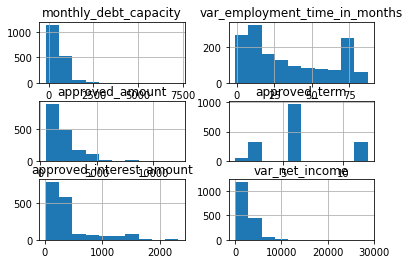

In [144]:
x_df.hist();


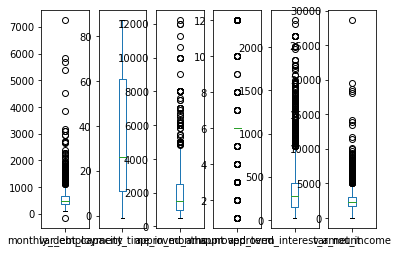

In [145]:
x_df.plot(kind='box', subplots=True);

## 2.3 - One hot encoding para columnas categóricas
Se analizó previamente que de hecho existían columnas con atributos *categóricos* en el dataframe. Debido a que estas columnas contienen información importante para el entrenamiento de nuestros modelos a usar, teníamos que encontrar la manera de convertirlas en valores numéricos para que dichos modelos las entiendan. Entonces, decidimos usar la técnica de *One Hot Encoding* , usando la función get_dummies() de pandas.

In [146]:
for i,id in enumerate(x_df["idPrestamo"]):
    x_df['idPrestamo'][i]=i

#check if theres that one step left / colab class
x_df = pd.concat([x_df,pd.get_dummies(df['credit_history_marital_status'], prefix='CHMS')],axis=1)
x_df.drop(['credit_history_marital_status'],axis=1, inplace=True)

x_df = pd.concat([x_df,pd.get_dummies(df['var_max_sbs_qual_12m'], prefix='VMSQ12')],axis=1)
x_df.drop(['var_max_sbs_qual_12m'],axis=1, inplace=True)


Luego, simplemente usamos head() para visualizar el estado del dataframe, y cada vez mas se está poniendo más listo para utilizar.

In [147]:
x_df.head(5)

,idPrestamo,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,CHMS_C,CHMS_D,CHMS_S,CHMS_V,VMSQ12_CPP,VMSQ12_DEFICIENTE,VMSQ12_DUDOSO,VMSQ12_NORMAL,VMSQ12_PERDIDA
0,0,252.389999,9.0,1200.0,6.0,289.109985,1140.125000,1,0,0,0,0,0,0,1,0
1,1,244.570007,50.0,2200.0,12.0,696.150024,1061.375000,0,0,1,0,0,0,0,1,0
2,2,491.500000,64.0,1000.0,3.0,84.989998,2082.196777,0,0,1,0,0,0,0,1,0
3,3,848.650024,77.0,1500.0,6.0,221.529999,3422.423340,0,0,1,0,0,0,0,1,0
4,4,470.519989,82.0,1000.0,3.0,91.339996,1882.089966,0,0,1,0,0,0,0,1,0


In [148]:
x_df.describe()

,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,CHMS_C,CHMS_D,CHMS_S,CHMS_V,VMSQ12_CPP,VMSQ12_DEFICIENTE,VMSQ12_DUDOSO,VMSQ12_NORMAL,VMSQ12_PERDIDA
count,1719.000000,1519.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000
mean,584.639465,33.979591,2136.998291,6.464805,407.185822,2693.545898,0.162885,0.007563,0.828970,0.000582,0.117510,0.018034,0.000582,0.861547,0.002327
std,459.958893,26.889423,1504.944702,3.009842,407.703064,1825.694702,0.369369,0.086659,0.376644,0.024119,0.322121,0.133112,0.024119,0.345475,0.048196
min,-158.750000,-1.000000,500.000000,1.000000,22.820000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,350.760010,11.000000,1000.000000,6.000000,152.320007,1750.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,480.739990,26.000000,1500.000000,6.000000,281.390015,2373.758301,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,660.820007,61.000000,2500.000000,6.000000,429.799988,3075.133423,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,7243.200195,87.000000,12200.000000,12.000000,2311.120117,28587.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 2.4 - Reemplazamos Valores Faltantes
Como se analizó previamente, en la sección de exploración de datos, había una columna que contenía 200 valores nulos. Para solucionar esto, como nos dimos cuenta que no habían muchos registros en el dataset, no decidimos descartar esas filas que contenían los valores nulos. Entonces, lo que decidimos hacer fue usar un SimpleImputer que reemplaza esos valores nulos por, en este caso, la media de esa columna

Importamos SimpleImputer de *sklearn* y creamos un modelo imputer.

In [149]:
from sklearn.impute import SimpleImputer

imputer_mean = SimpleImputer(strategy = "mean")

Entrenamos este modelo con el nuestro dataset.

In [150]:
imputer_mean.fit(x_df)
columns = x_df.columns

In [151]:
imputer_mean.statistics_

array([8.59000000e+02, 5.84639483e+02, 3.39795918e+01, 2.13699825e+03,
       6.46480512e+00, 4.07185828e+02, 2.69354588e+03, 1.62885398e-01,
       7.56253636e-03, 8.28970332e-01, 5.81733566e-04, 1.17510180e-01,
       1.80337405e-02, 5.81733566e-04, 8.61547411e-01, 2.32693426e-03])

In [152]:
x_df = imputer_mean.transform(x_df)


Después de transformar a nuestro dataframe con el imputer mencionado, podemos ver que ninguna columna tiene valores faltantes, lo que implica que está un poco más listo para utilizar.

In [153]:
x_df = pd.DataFrame(data=x_df,columns=columns)
x_df.isna().sum()


idPrestamo                       0
monthly_debt_capacity            0
var_employment_time_in_months    0
approved_amount                  0
approved_term                    0
approved_interest_amount         0
var_net_income                   0
CHMS_C                           0
CHMS_D                           0
CHMS_S                           0
CHMS_V                           0
VMSQ12_CPP                       0
VMSQ12_DEFICIENTE                0
VMSQ12_DUDOSO                    0
VMSQ12_NORMAL                    0
VMSQ12_PERDIDA                   0
dtype: int64

## 2.5 - Definición de columna Idprestamo como Índices
Debido a que había una columna en el dataframe solamente para los índices de las filas, decidimos convertirla a la columna principal de índices para que no malogre el entrenamiento cuando lleguemos a esa parte.

In [154]:
x_df = x_df.set_index("idPrestamo")

## 2.6 - Normalización
Nos dimos cuenta que los valores de las columnas tenían rangos diferentes, decidimos aplicarle una normalización, que ayuda a que todos estén en una misma escala. Para esto, se usó sklearn y creamos un modelo Normalizer(). Lo entrenamos, y luego transformamos nuestro dataframe para ver el resultado.

In [155]:
import pandas as pd
from sklearn import preprocessing

normalizer = preprocessing.Normalizer().fit(x_df)
test =normalizer.transform(x_df)
columnsDF = x_df.columns
x_df = pd.DataFrame(data = test, columns = columnsDF)
x_df.head()

,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,CHMS_C,CHMS_D,CHMS_S,CHMS_V,VMSQ12_CPP,VMSQ12_DEFICIENTE,VMSQ12_DUDOSO,VMSQ12_NORMAL,VMSQ12_PERDIDA
0,0.148534,0.005297,0.706214,0.003531,0.170145,0.670977,0.000589,0.0,0.000000,0.0,0.0,0.0,0.0,0.000589,0.0
1,0.095828,0.019591,0.862010,0.004702,0.272767,0.415871,0.000000,0.0,0.000392,0.0,0.0,0.0,0.0,0.000392,0.0
2,0.207911,0.027073,0.423014,0.001269,0.035952,0.880798,0.000000,0.0,0.000423,0.0,0.0,0.0,0.0,0.000423,0.0
3,0.221058,0.020057,0.390723,0.001563,0.057705,0.891479,0.000000,0.0,0.000260,0.0,0.0,0.0,0.0,0.000260,0.0
4,0.215239,0.037511,0.457450,0.001372,0.041783,0.860962,0.000000,0.0,0.000457,0.0,0.0,0.0,0.0,0.000457,0.0


monthly_debt_capacity    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

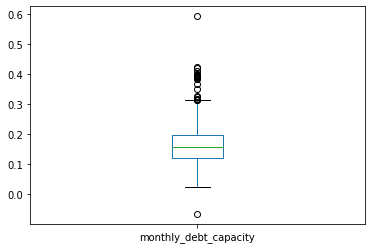

In [156]:
x_df["monthly_debt_capacity"].plot(kind='box', subplots=True)

# 3. Eleccion de Modelos a Utilizar

## 3.1 - K-Nearest Neighbors Model

In [157]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = 0
knn = KNeighborsClassifier(n_neighbors=neighbors)


## 3.2 - Decision Tree Model
Se escogió el modelo Decision Tree para contar con un modelo simple que no necesite hiper-parámetros, la finalidad principal de usar este modelo es ver qué impacto tiene con nuestro dataset y poder compararlo con los demás modelos a usar

In [158]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

## 3.3 - Logistic Regression Model

Despues de realizar una investigación sobre modelos aplicados al banking, y en particular a predicción de riesgos para prestamo, concluimos que Logistic Regression es una opción bastante viable, optima y sencilla para el problema planteado.

In [159]:
from sklearn.linear_model import LogisticRegression
clf_LR = LogisticRegression(random_state=0)

## 3.4 - XGBoost Model
Siguiendo la linea de la investigación realizada, encontramos en el modelo de XGboost una opción más sofisticada y mas controlable de Logistic Regression. Por ello la proponemos como una opción mejorada del modelo anterior que nos permita jugar más con los hiper-parámetros.


In [160]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xg_model = xgb.XGBClassifier(learning_rate =0.1,
									n_estimators=1000,
									max_depth=5,
									min_child_weight=1,
									gamma=0,
									subsample=0.8,
									colsample_bytree=0.8,
									objective= 'binary:logistic',
									scale_pos_weight=1)

# 4. Validacion de Modelos

## 4.1  HOLDOUT SETS

### 4.1.0 - Particion del dataframe 80-20
Para este tipo de validación, se particiona el dataframe en 2 partes: uno para entrenamiento y el otro para la validación. Entonces hacemos eso, 80% para entrenamiento y 20% para el testing.

In [161]:
splitIndex = int(x_df.shape[0]*0.8)
X_train = x_df.iloc[:splitIndex].to_numpy()
X_test = x_df.iloc[splitIndex:].to_numpy()

Y_train = y_df.iloc[:splitIndex].to_numpy()
Y_test = y_df.iloc[splitIndex:].to_numpy()

### 4.1.1 - k-Nearest Neighbors
Importamos el paquete accuracy_score para obtener la medida de exactitud después de entrenar los modelos escogidos.

In [162]:
from sklearn.metrics import accuracy_score


Minimum error:- 0.2877906976744186 at K = 34


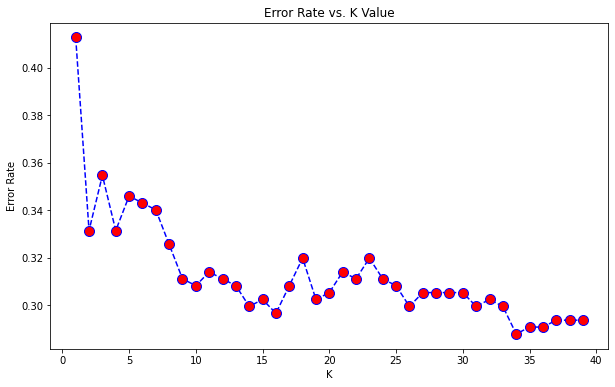

In [163]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,Y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != Y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

Maximum accuracy: 0.7122093023255814 at K = 34


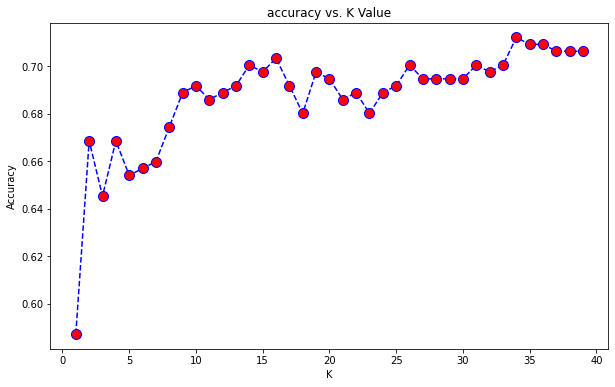

In [164]:

acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,Y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(Y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:",max(acc),"at K =",acc.index(max(acc))+1)

In [165]:
knn_mod = KNeighborsClassifier(n_neighbors = 34).fit(X_train,Y_train)
y2_model = knn_mod.predict(X_test)
accuracy_score(Y_test, y2_model)

0.7122093023255814

### 4.1.2 - Decision Tree Model

In [166]:

clf = clf.fit(X_train, Y_train)
y2_dtModel = clf.predict(X_test)
accuracy_score(Y_test, y2_dtModel)

0.6453488372093024

### 4.1.3 - Logistic Regression

In [167]:
clf_LR.fit(X_train, Y_train)
y_LRModel = clf_LR.predict(X_test)
clf_LR.score(X_test, Y_test)

0.7034883720930233

Como podemos ver, el modelo de Logistic Regression obtuvo una exactitud de 70% aproximadamente, que se asemeja al modelo kNN.

### 4.2.4 - XGBoost

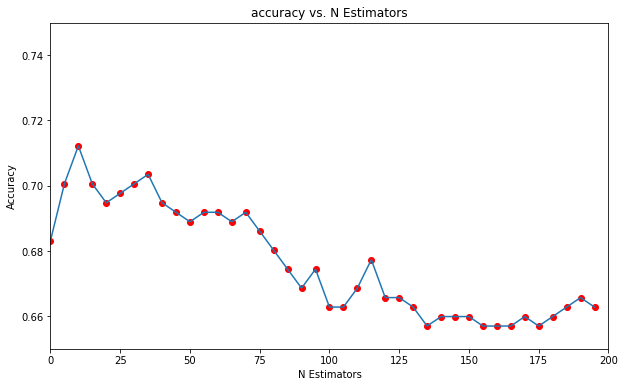

Maximum accuracy:  0.7122093023255814 at Estimator with N = 10


In [168]:
result_xgb_ac=[]
result_xgb_n_estimators=[]
for i in range(0,200,5):
    xg_model_test = xgb.XGBClassifier(learning_rate =0.1,
									n_estimators=i,
									max_depth=5,
									min_child_weight=1,
									gamma=0,
									subsample=0.8,
									colsample_bytree=0.8,
									objective= 'binary:logistic',
									scale_pos_weight=1)
    xg_model_test.fit(X_train,Y_train)
    y_XGB = xg_model_test.predict(X_test)
    aux_score = accuracy_score(Y_test, y_XGB)
    result_xgb_ac+=[aux_score]
    result_xgb_n_estimators+=[i]

plt.figure(figsize=(10,6))
plt.scatter(result_xgb_n_estimators, result_xgb_ac, c='r')
plt.plot(result_xgb_n_estimators, result_xgb_ac)
plt.xlabel('N Estimators')
plt.ylabel('Accuracy')
plt.xlim(0, 200)
plt.ylim(0.65, 0.75)
plt.title('accuracy vs. N Estimators')
plt.show()
print("Maximum accuracy: ",max(result_xgb_ac),"at Estimator with N =",result_xgb_n_estimators[result_xgb_ac.index(max(result_xgb_ac))])


In [169]:
xg_model = xgb.XGBClassifier(learning_rate =0.1,
									n_estimators=10,
									max_depth=5,
									min_child_weight=1,
									gamma=0,
									subsample=0.8,
									colsample_bytree=0.8,
									objective= 'binary:logistic',
									scale_pos_weight=1)

In [170]:
xg_model.fit(X_train,Y_train)
y_XGB = xg_model.predict(X_test)
accuracy_score(Y_test, y_XGB)

0.7122093023255814

Como podemos ver, xgboost obtuvo una exactitud de 69% aproximadamente, que se asemeja al modelo kNN y Logistic Regression.

## 4.2 Cross Validation

Tambien decidimos usar para la validacion de nuestros modelos la tecnica Cross Validation. Utilizamos la libreria sklearn una vez mas para importar el paquete de cross_val_score, que nos otroga la función que utilizaremos.

In [171]:
from sklearn.model_selection import cross_val_score


### 4.2.1 - k-Nearest Neighbors

In [172]:
cvKNN = cross_val_score(knn, x_df,y_df, cv=20)
print(cvKNN)

[0.69767442 0.70930233 0.6627907  0.68604651 0.63953488 0.65116279
 0.72093023 0.72093023 0.70930233 0.73255814 0.74418605 0.74418605
 0.75581395 0.72093023 0.70930233 0.72093023 0.72093023 0.70930233
 0.72093023 0.70588235]


In [173]:
print(cvKNN.mean())

0.7091313269493844


Como podemos ver, con esta técnica de validación, se obtuvo una exactitud *promedio* de 71% para el modelo de kNN, 1% más que con la técnica previa.

### 4.2.2 - Decision Tree Model

In [174]:
cvDT = cross_val_score(clf, x_df, y_df, cv=20)
print(cvDT)

[0.62790698 0.60465116 0.54651163 0.69767442 0.55813953 0.6744186
 0.6744186  0.6744186  0.6627907  0.62790698 0.65116279 0.6744186
 0.60465116 0.65116279 0.6627907  0.68604651 0.70930233 0.62790698
 0.62790698 0.63529412]


In [175]:
print(cvDT.mean())

0.6439740082079343


Como podemos ver, con esta técnica de validación, se obtuvo una exactitud *promedio* de 63% para el modelo de Decision Tree, 3% más que con la técnica previa.

### 4.2.3 - Logistic Regression

In [176]:
cvLR = cross_val_score(clf_LR, x_df, y_df, cv=20)
print(cvLR)

[0.70930233 0.73255814 0.6744186  0.75581395 0.69767442 0.70930233
 0.76744186 0.6744186  0.70930233 0.74418605 0.73255814 0.74418605
 0.74418605 0.75581395 0.70930233 0.70930233 0.70930233 0.73255814
 0.73255814 0.75294118]


In [177]:
print(cvLR.mean())

0.7248563611491108


Como podemos ver, con esta técnica de validación, se obtuvo una exactitud *promedio* de 72% para el modelo de Logistic Regression, 2% más que con la técnica previa.

### 4.2.4 - XGBoost

In [178]:
cvXGB = cross_val_score(xg_model, x_df, y_df, cv=30)
print(cvXGB)

[0.67241379 0.62068966 0.77586207 0.70689655 0.72413793 0.77586207
 0.75862069 0.63793103 0.67241379 0.78947368 0.71929825 0.70175439
 0.78947368 0.71929825 0.68421053 0.70175439 0.71929825 0.77192982
 0.75438596 0.73684211 0.73684211 0.64912281 0.70175439 0.71929825
 0.68421053 0.77192982 0.71929825 0.70175439 0.68421053 0.73684211]


In [179]:
print(cvXGB.mean())

0.717927001411575


Como podemos ver, con esta técnica de validación, se obtuvo una exactitud *promedio* de 71% para el modelo de XGBoost, 2% más que con la técnica previa.

# 5. Resultados Finales


In [180]:
a1 = round((accuracy_score(Y_test, y2_model)*100),2)
a2 = round((accuracy_score(Y_test, y2_dtModel)*100),2)
a3 = round((clf_LR.score(X_test, Y_test)*100),2)
a4 = round((accuracy_score(Y_test, y_XGB)*100),2)


print("KNN accuracy: " + str(a1)+"%")
print("Decision Tree accuracy: " + str(a2)+"%")
print("Logistic Regression accuracy: " + str(a3)+"%")
print("XGBoost accuracy: " + str(a4)+"%")

KNN accuracy: 71.22%
Decision Tree accuracy: 64.53%
Logistic Regression accuracy: 70.35%
XGBoost accuracy: 71.22%


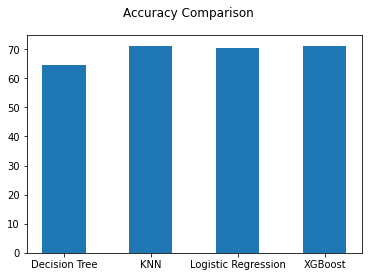

In [181]:
fig = plt.figure()

fig.suptitle("Accuracy Comparison")
ax = fig.add_subplot(111)

names = ['Decision Tree', 'KNN', 'Logistic Regression', 'XGBoost']
accuracy = [a2,a1,a3,a4]
ax.bar(names,accuracy, width = 0.5)
plt.show()

En este gráfico comparamos el accuracy de nuestros cuatro modelos utilizando la validación de Holdout sets, como se puede ver los modelos K-Nearest Neighbor y XGBoost son los que nos dan mayor porcentaje de accuracy, un 71,22%. Recordemos que KNN buscó el mejor número de negihbors para este modelo; así como tambien XGBoost que buscó el la mejor cantidad de N Estimators. En segunda posición tenemos a Logistic Regression con 70.35%, y con 61,34% le siguen el modelo Decision Tree.

In [182]:
results = []
names = []

In [183]:
##### Decision Tree

cv_resultsDT = cross_val_score(clf,x_df,y_df, cv=20)
results.append(cv_resultsDT)
names.append("Decision Tree")

msg = "%s: %f (%f)" % (names[0], cv_resultsDT.mean(),cv_resultsDT.std())
print(msg)


Decision Tree: 0.634651 (0.045855)


In [184]:
##### Logistic Regression

cv_resultsLR = cross_val_score(clf_LR, x_df,y_df, cv=20)
results.append(cv_resultsLR)
names.append("Logistic Regression")

msg = "%s: %f (%f)" % (names[1], cv_resultsLR.mean(),cv_resultsLR.std())
print(msg)

Logistic Regression: 0.724856 (0.025647)


In [185]:
##### K Nearest Neighbor

cv_resultsKNN = cross_val_score(knn, x_df,y_df, cv=20)
results.append(cv_resultsKNN)
names.append("K Nearest Neighbor")

msg = "%s: %f (%f)" % (names[2], cv_resultsKNN.mean(),cv_resultsKNN.std())
print(msg)

K Nearest Neighbor: 0.709131 (0.029195)


In [186]:
##### XGBoost

cv_resultsXGB = cross_val_score(xg_model, x_df, y_df, cv=20)
results.append(cv_resultsXGB)
names.append("XGBoost")

msg = "%s: %f (%f)" % (names[3], cv_resultsXGB.mean(),cv_resultsXGB.std());
print(msg)

XGBoost: 0.721936 (0.028409)


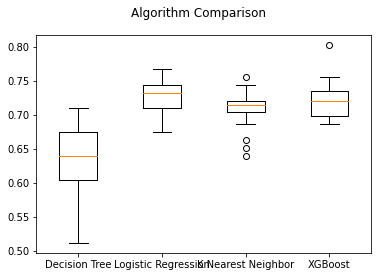

In [187]:
import matplotlib.pyplot as pyplot

fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')

ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

En el gráfico de cajas demostramos la variación del accuracy que nuestros modelos tienen con base en cross validation, en este tipo de validación el mejor modelo es Logistic Regression con un accuracy que varía entre 70,9% y 75,3% con una media de
72,49%, en relación a los demás modelos se ve una clara ventaja, teniendo muy por debajo al modelo Decision Tree que consigue variaciones de accuracy entre 62,8% y 65,9% con una media de 63,2%, esto puede justificarse a que se utilizaron los parámetros por defecto del modelo.

# 6. Conclusiones
En conclusión, podemos decir que comparando los dos tipos de validaciones usadas de los cuatro modelos implementados, el mejor modelo aplicado a este dataset fue Logistic Regression utilizando Cross Validation con 20 particiones, se consiguió un accuracy de 72,48%. En segundo lugar observamos que los modelos XGBoost y K-Nearest Neighbor empataron en la segunda mayor precisión con 71.22%. Para el modelo KNN con 34 neighbors se utilizó la validación de Holdout sets que produjo el accuracy mencionado lineas arriba. Cabe destacar que se hizo una comparación de 1 a 40 neighbors para conocer el número de neighbors que nos proporcione el mayor accuracy posible. Con relación a XGboost, primero se realizo una comparación entre el número de n estimators y concluimos que la cantidad idónea fue de 10 estimators. Por ello, obtuvimos el mismo accuracy de KNN.Finalmente, Decision Tree se quedó último con un accuracy de 63,18%. Tras recalcar estos resultados concluimos que la mejor opción de modelo para este Dataset sería la implementación de Linear Regression.